<a href="https://colab.research.google.com/github/piyuss/hyperspectral-image-demo/blob/main/spectral_data_analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part of the tutorial, we will use a published dataset of spectroscopic data. We will import the spectral data from the following publication:

Munawar, Agus (2019), “Dataset of NIR spectrum for intact mango fruits”, Mendeley Data, V1, doi: 10.17632/b9d6s7hr33.1

In [1]:
!wget https://raw.githubusercontent.com/piyuss/hyperspectral-image-demo/main/files/Dataset_RawSpectrum_NIRS_for_Intact_Mangoes.csv

--2021-05-17 15:23:42--  https://raw.githubusercontent.com/piyuss/hyperspectral-image-demo/main/files/Dataset_RawSpectrum_NIRS_for_Intact_Mangoes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2761629 (2.6M) [text/plain]
Saving to: ‘Dataset_RawSpectrum_NIRS_for_Intact_Mangoes.csv’

Dataset_RawSpectrum 100%[===================>]   2.63M  --.-KB/s    in 0.1s    

2021-05-17 15:23:42 (23.1 MB/s) - ‘Dataset_RawSpectrum_NIRS_for_Intact_Mangoes.csv’ saved [2761629/2761629]



In [3]:
import pandas as pd

nirs_dataset = pd.read_csv("Dataset_RawSpectrum_NIRS_for_Intact_Mangoes.csv")

In [4]:
nirs_dataset

,No,Mango Cultivars,Vit C (mg/100g),TA (mg/100g),SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003,1003.4,1003.8,1004.2,1004.5,1004.9,1005.3,1005.7,1006.1,1006.5,1006.9,1007.3,1007.7,1008.1,1008.5,1008.8,1009.2,1009.6,1010,1010.4,1010.8,1011.2,1011.6,1012,1012.4,1012.8,1013.2,...,2411.8,2414.1,2416.3,2418.6,2420.9,2423.1,2425.4,2427.7,2429.9,2432.2,2434.5,2436.8,2439.1,2441.4,2443.7,2446,2448.3,2450.6,2452.9,2455.2,2457.6,2459.9,2462.2,2464.6,2466.9,2469.3,2471.6,2474,2476.3,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,label
0,1,Cengkir,62.51267,599.6819,8.695,0.517039,0.516867,0.516921,0.516366,0.516205,0.515660,0.515261,0.514720,0.514282,0.513759,0.513524,0.512883,0.512040,0.511836,0.511466,0.510771,0.510573,0.510286,0.510416,0.509871,0.509102,0.509045,0.508764,0.507712,0.507338,0.507047,0.506522,0.506149,0.506140,0.505477,0.504581,0.503678,0.503562,0.503196,0.502595,...,1.451028,1.452907,1.455119,1.456790,1.458531,1.460541,1.463049,1.465075,1.467140,1.469079,1.470975,1.473063,1.475524,1.477250,1.479047,1.480704,1.482536,1.484133,1.485423,1.487448,1.489874,1.491511,1.493472,1.495189,1.496648,1.498207,1.499908,1.501218,1.502628,1.503947,1.505065,1.505929,1.506978,1.507936,1.508755,1.509356,1.510223,1.510651,1.511547,Cengkir
1,2,Cengkir,58.55433,488.5819,8.825,0.465913,0.465593,0.465691,0.465959,0.465898,0.464764,0.464363,0.464231,0.464284,0.464047,0.463306,0.462537,0.462090,0.462184,0.462087,0.461413,0.461225,0.461250,0.461060,0.460361,0.459998,0.459708,0.459456,0.458929,0.458720,0.458615,0.457893,0.457400,0.457637,0.457247,0.456544,0.455946,0.455792,0.455536,0.455393,...,1.294244,1.296921,1.299977,1.302884,1.305948,1.308995,1.312356,1.315681,1.319029,1.322343,1.326030,1.329355,1.333051,1.336487,1.339452,1.341925,1.345077,1.348464,1.351959,1.355116,1.358515,1.361897,1.365610,1.369055,1.372552,1.375687,1.378162,1.380810,1.384078,1.386533,1.388579,1.390588,1.393135,1.395065,1.396263,1.397289,1.398694,1.400154,1.401989,Cengkir
2,3,Cengkir,62.09600,549.2490,9.225,0.550232,0.549902,0.549755,0.549763,0.549980,0.549185,0.548379,0.547819,0.547142,0.546779,0.546289,0.545881,0.545395,0.545310,0.545080,0.544441,0.544153,0.543888,0.543624,0.542972,0.542336,0.542070,0.541762,0.541138,0.541237,0.540995,0.540085,0.539494,0.539216,0.538846,0.538749,0.537969,0.537597,0.537360,0.536321,...,1.398204,1.399961,1.401805,1.404297,1.406722,1.408986,1.411263,1.413224,1.416033,1.418199,1.420678,1.423618,1.426326,1.428225,1.429996,1.431525,1.433276,1.435272,1.437252,1.439129,1.441617,1.443685,1.445681,1.448145,1.450506,1.451636,1.453299,1.455403,1.457336,1.458508,1.459362,1.460702,1.462801,1.463697,1.463799,1.464256,1.464685,1.465478,1.466563,Cengkir
3,4,Cengkir,62.30433,464.3660,8.965,0.462931,0.462902,0.462700,0.462785,0.462643,0.461748,0.461245,0.461259,0.461403,0.460890,0.460205,0.459927,0.459609,0.459211,0.458932,0.458346,0.458135,0.458036,0.457759,0.457174,0.456909,0.457050,0.456629,0.455582,0.455536,0.455690,0.455230,0.454661,0.454629,0.454190,0.453991,0.453306,0.453150,0.452743,0.452276,...,1.299757,1.302544,1.305631,1.308607,1.311940,1.314975,1.318544,1.321509,1.324848,1.328294,1.331992,1.335412,1.338916,1.341945,1.345154,1.348019,1.351238,1.354215,1.357416,1.360375,1.364054,1.367693,1.371355,1.374439,1.377544,1.380604,1.383608,1.386249,1.388994,1.391381,1.393639,1.395964,1.398350,1.400225,1.401508,1.402762,1.404272,1.405578,1.406921,Cengkir
4,5,Cengkir,46.24100,346.8490,9.435,0.449824,0.449643,0.449870,0.450019,0.449672,0.448840,0.448700,0.448091,0.447702,0.447621,0.447355,0.446985,0.446363,0.446003,0.445648,0.445265,0.445154,0.444928,0.444724,0.444065,0.443634,0.443603,0.443247,0.442564,0.442659,0.442412,0.441728,0.441158,0.440854,0.440606,0.440701,0.439819,0.439192,0.438836,0.438551,...,1.307016,1.309698,1.312736,1.315720,1.318879,1.322162,1.325248,1.328376,1.331955,1.335313,1.338862,1.342165,1.345755,1.349008,1.352393,1.355621,1.358508,1.361409,1.364962,1.368280,1.371806,1.375329,1.378771,1.3820

In [14]:
X = nirs_dataset.iloc[:,6:-1]
X

,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003,1003.4,1003.8,1004.2,1004.5,1004.9,1005.3,1005.7,1006.1,1006.5,1006.9,1007.3,1007.7,1008.1,1008.5,1008.8,1009.2,1009.6,1010,1010.4,1010.8,1011.2,1011.6,1012,1012.4,1012.8,1013.2,1013.6,1014,1014.4,1014.8,1015.2,1015.6,...,2409.6,2411.8,2414.1,2416.3,2418.6,2420.9,2423.1,2425.4,2427.7,2429.9,2432.2,2434.5,2436.8,2439.1,2441.4,2443.7,2446,2448.3,2450.6,2452.9,2455.2,2457.6,2459.9,2462.2,2464.6,2466.9,2469.3,2471.6,2474,2476.3,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2
0,0.516867,0.516921,0.516366,0.516205,0.515660,0.515261,0.514720,0.514282,0.513759,0.513524,0.512883,0.512040,0.511836,0.511466,0.510771,0.510573,0.510286,0.510416,0.509871,0.509102,0.509045,0.508764,0.507712,0.507338,0.507047,0.506522,0.506149,0.506140,0.505477,0.504581,0.503678,0.503562,0.503196,0.502595,0.502101,0.501816,0.500998,0.500406,0.500222,0.499691,...,1.449093,1.451028,1.452907,1.455119,1.456790,1.458531,1.460541,1.463049,1.465075,1.467140,1.469079,1.470975,1.473063,1.475524,1.477250,1.479047,1.480704,1.482536,1.484133,1.485423,1.487448,1.489874,1.491511,1.493472,1.495189,1.496648,1.498207,1.499908,1.501218,1.502628,1.503947,1.505065,1.505929,1.506978,1.507936,1.508755,1.509356,1.510223,1.510651,1.511547
1,0.465593,0.465691,0.465959,0.465898,0.464764,0.464363,0.464231,0.464284,0.464047,0.463306,0.462537,0.462090,0.462184,0.462087,0.461413,0.461225,0.461250,0.461060,0.460361,0.459998,0.459708,0.459456,0.458929,0.458720,0.458615,0.457893,0.457400,0.457637,0.457247,0.456544,0.455946,0.455792,0.455536,0.455393,0.454834,0.454289,0.453440,0.453017,0.452782,0.452279,...,1.291585,1.294244,1.296921,1.299977,1.302884,1.305948,1.308995,1.312356,1.315681,1.319029,1.322343,1.326030,1.329355,1.333051,1.336487,1.339452,1.341925,1.345077,1.348464,1.351959,1.355116,1.358515,1.361897,1.365610,1.369055,1.372552,1.375687,1.378162,1.380810,1.384078,1.386533,1.388579,1.390588,1.393135,1.395065,1.396263,1.397289,1.398694,1.400154,1.401989
2,0.549902,0.549755,0.549763,0.549980,0.549185,0.548379,0.547819,0.547142,0.546779,0.546289,0.545881,0.545395,0.545310,0.545080,0.544441,0.544153,0.543888,0.543624,0.542972,0.542336,0.542070,0.541762,0.541138,0.541237,0.540995,0.540085,0.539494,0.539216,0.538846,0.538749,0.537969,0.537597,0.537360,0.536321,0.535552,0.535525,0.535121,0.534657,0.534220,0.533321,...,1.396029,1.398204,1.399961,1.401805,1.404297,1.406722,1.408986,1.411263,1.413224,1.416033,1.418199,1.420678,1.423618,1.426326,1.428225,1.429996,1.431525,1.433276,1.435272,1.437252,1.439129,1.441617,1.443685,1.445681,1.448145,1.450506,1.451636,1.453299,1.455403,1.457336,1.458508,1.459362,1.460702,1.462801,1.463697,1.463799,1.464256,1.464685,1.465478,1.466563
3,0.462902,0.462700,0.462785,0.462643,0.461748,0.461245,0.461259,0.461403,0.460890,0.460205,0.459927,0.459609,0.459211,0.458932,0.458346,0.458135,0.458036,0.457759,0.457174,0.456909,0.457050,0.456629,0.455582,0.455536,0.455690,0.455230,0.454661,0.454629,0.454190,0.453991,0.453306,0.453150,0.452743,0.452276,0.451695,0.451469,0.450809,0.450286,0.449896,0.449266,...,1.296853,1.299757,1.302544,1.305631,1.308607,1.311940,1.314975,1.318544,1.321509,1.324848,1.328294,1.331992,1.335412,1.338916,1.341945,1.345154,1.348019,1.351238,1.354215,1.357416,1.360375,1.364054,1.367693,1.371355,1.374439,1.377544,1.380604,1.383608,1.386249,1.388994,1.391381,1.393639,1.395964,1.398350,1.400225,1.401508,1.402762,1.404272,1.405578,1.406921
4,0.449643,0.449870,0.450019,0.449672,0.448840,0.448700,0.448091,0.447702,0.447621,0.447355,0.446985,0.446363,0.446003,0.445648,0.445265,0.445154,0.444928,0.444724,0.444065,0.443634,0.443603,0.443247,0.442564,0.442659,0.442412,0.441728,0.441158,0.440854,0.440606,0.440701,0.439819,0.439192,0.438836,0.438551,0.438027,0.437847,0.437389,0.437025,0.436571,0.435669,...,1.304105,1.307016,1.309698,1.312736,1.315720,1.318879,1.322162,1.325248,1.328376,1.331955,1.335313,1.338862,1.342165,1.345755,1.349008,1.352393,1.355621,1.358508,1.361409,1.364962

Text(0.5, 1.05, 'Plot of raw intensity values')

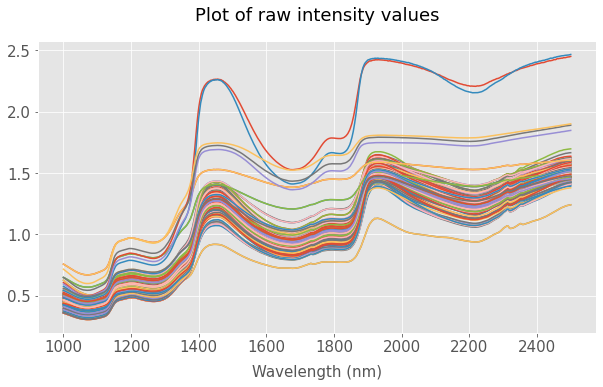

In [38]:
import matplotlib.pyplot as plt
wl = [float(x) for x in X.columns]
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(top=0.8)
plt.style.use('ggplot')
 
ax1 = fig.add_subplot()
ttl = ax1.title
ttl.set_position([0.5, 1.05])
wavelengths = [str(l) for l in wl]
for index, row in X.iterrows():
    ax1.plot(wl, row.values)
ax1.set_xlabel('Wavelength (nm)', fontsize = 15, labelpad = 10)
ax1.tick_params(axis='both', which='major', labelsize=15)


plt.title("Plot of raw intensity values", fontsize=18)


In [40]:
y = nirs_dataset.label

In [47]:
import numpy as np
def snv(table1):
    snv_table = np.zeros_like(table1)
    for i in range(table1.shape[0]):
        snv_table[i,:] = (table1[i,:] - np.mean(table1[i,:])) / np.std(table1[i,:])
    return snv_table

In [86]:
snv_array = snv(X.values)
X_snv = pd.DataFrame(snv_array)

In [87]:
X_snv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
0,-1.162790,-1.162635,-1.164224,-1.164682,-1.166244,-1.167384,-1.168932,-1.170184,-1.171680,-1.172352,-1.174186,-1.176599,-1.177182,-1.178240,-1.180229,-1.180794,-1.181616,-1.181243,-1.182803,-1.185001,-1.185165,-1.185969,-1.188977,-1.190050,-1.190880,-1.192384,-1.193451,-1.193476,-1.195372,-1.197935,-1.200520,-1.200850,-1.201897,-1.203616,-1.205030,-1.205845,-1.208184,-1.209879,-1.210403,-1.211922,...,1.503909,1.509444,1.514819,1.521147,1.525927,1.530907,1.536657,1.543831,1.549626,1.555533,1.561080,1.566504,1.572477,1.579517,1.584454,1.589594,1.594334,1.599575,1.604143,1.607833,1.613626,1.620566,1.625248,1.630858,1.635770,1.639943,1.644403,1.649269,1.653016,1.657049,1.660823,1.664021,1.666492,1.669493,1.672233,1.674576,1.676295,1.678775,1.680000,1.682563
1,-1.105682,-1.105353,-1.104457,-1.104661,-1.108450,-1.109790,-1.110233,-1.110057,-1.110847,-1.113322,-1.115893,-1.117387,-1.117072,-1.117399,-1.119649,-1.120279,-1.120194,-1.120830,-1.123166,-1.124380,-1.125349,-1.126191,-1.127950,-1.128650,-1.129000,-1.131413,-1.133062,-1.132269,-1.133573,-1.135922,-1.137920,-1.138435,-1.139289,-1.139767,-1.141635,-1.143459,-1.146294,-1.147709,-1.148494,-1.150176,...,1.654679,1.663565,1.672512,1.682724,1.692439,1.702679,1.712861,1.724093,1.735205,1.746394,1.757469,1.769790,1.780902,1.793254,1.804736,1.814645,1.822909,1.833443,1.844762,1.856442,1.866992,1.878351,1.889653,1.902062,1.913574,1.925261,1.935738,1.944009,1.952858,1.963779,1.971984,1.978821,1.985535,1.994047,2.000496,2.004500,2.007929,2.012624,2.017503,2.023636
2,-1.059893,-1.060360,-1.060335,-1.059644,-1.062180,-1.064752,-1.066537,-1.068696,-1.069854,-1.071416,-1.072719,-1.074268,-1.074541,-1.075275,-1.077312,-1.078231,-1.079078,-1.079917,-1.081999,-1.084027,-1.084876,-1.085857,-1.087848,-1.087532,-1.088306,-1.091207,-1.093093,-1.093980,-1.095159,-1.095469,-1.097958,-1.099145,-1.099900,-1.103214,-1.105666,-1.105754,-1.107042,-1.108521,-1.109917,-1.112783,...,1.639189,1.646127,1.651731,1.657614,1.665563,1.673298,1.680520,1.687784,1.694039,1.703000,1.709909,1.717817,1.727195,1.735834,1.741891,1.747541,1.752418,1.758004,1.764371,1.770687,1.776674,1.784611,1.791208,1.797575,1.805435,1.812966,1.816571,1.821876,1.828587,1.834753,1.838492,1.841216,1.845491,1.852186,1.855044,1.855370,1.856827,1.858196,1.860726,1.864187
3,-1.090722,-1.091389,-1.091108,-1.091577,-1.094524,-1.096179,-1.096136,-1.095662,-1.097350,-1.099606,-1.100523,-1.101568,-1.102879,-1.103799,-1.105729,-1.106423,-1.106751,-1.107662,-1.109588,-1.110461,-1.109997,-1.111384,-1.114834,-1.114984,-1.114476,-1.115991,-1.117866,-1.117973,-1.119418,-1.120072,-1.122330,-1.122841,-1.124184,-1.125723,-1.127636,-1.128378,-1.130554,-1.132275,-1.133562,-1.135635,...,1.655995,1.665559,1.674739,1.684906,1.694708,1.705686,1.715682,1.727437,1.737202,1.748200,1.759550,1.771729,1.782993,1.794534,1.804511,1.815080,1.824516,1.835118,1.844923,1.855466,1.865212,1.877329,1.889315,1.901376,1.911534,1.921760,1.931839,1.941733,1.950431,1.959472,1.967334,1.974771,1.982429,1.990287,1.996463,2.000689,2.004819,2.009792,2.014094,2.018517
4,-1.122300,-1.121572,-1.121095,-1.122206,-1.124869,-1.125316,-1.127266,-1.128510,-1.128771,-1.129621,-1.130805,-1.132796,-1.133951,-1.135087,-1.136312,-1.136667,-1.137390,-1.138045,-1.140154,-1.141531,-1.141633,-1.142772,-1.144958,-1.144652,-1.145443,-1.147633,-1.149458,-1.150430,-1.151224,-1.150920,-1.153744,-1.155750,-1.156891,-1.157803,-1.159481,-1.160057,-1.161522,-1.162687,-1.164142,-1.167029,...,1.612754,1.622072,1.630657,1.640381,1.649933,1.660044,1.670553,1.680431,1.690443,1.701900,1.712648,1.724008,1.734581,1.746072,1.756485,1.767320,1.777652,1.786893,1.796179,1.807552,1.818172,1.829459,1.840736,1.851753

Text(0.5, 1.05, 'Standard Normal Variate')

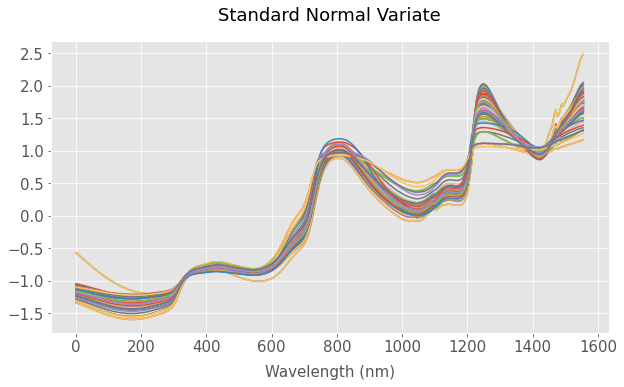

In [117]:
import matplotlib.pyplot as plt
wl = [float(x) for x in X_snv.columns]
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(top=0.8)
plt.style.use('ggplot')
 
ax1 = fig.add_subplot()
ttl = ax1.title
ttl.set_position([0.5, 1.05])
wavelengths = [str(l) for l in wl]
for index, row in X_snv.iterrows():
    ax1.plot(wl, row.values)
ax1.set_xlabel('Wavelength (nm)', fontsize = 15, labelpad = 10)
ax1.tick_params(axis='both', which='major', labelsize=15)

plt.title("Standard Normal Variate", fontsize=18)

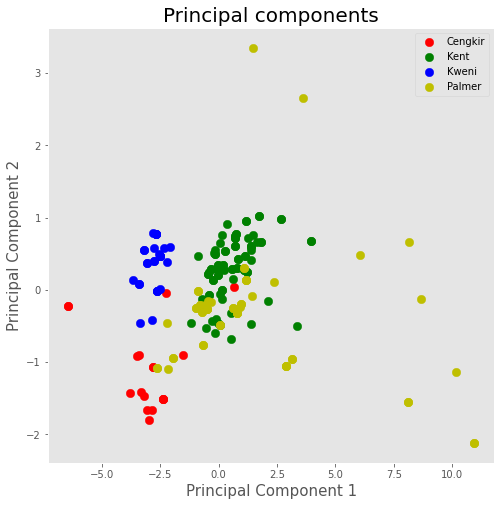

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_snv)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, nirs_dataset['label']], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal components', fontsize = 20)
targets = list(np.unique(nirs_dataset.label))
colors = ['r', 'g', 'b', 'y']
for label, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 70)
ax.legend(targets)
ax.grid()

In [132]:
#@title Create support-vector discrimination model for mango cultivar

def calculate_accuracy(conf_matrix1):
    import numpy as np
    accuracy1 = np.divide(cm[0,0],np.sum(cm[0,:]))
    accuracy2 = np.divide(cm[1,1],np.sum(cm[1,:]))
    accuracy3 = np.divide(cm[2,2],np.sum(cm[2,:]))
    accuracy4 = np.divide(cm[3,3],np.sum(cm[3,:]))

    return np.mean([accuracy1,accuracy2, accuracy3, accuracy4])


dfeat = X_snv.values
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn import svm

skf = StratifiedKFold(n_splits=2)

train_test_split = skf.split(X_snv.values,y)
accuracy_vector = []
cost_value = 10000
for train_index, test_index in train_test_split:
    X_train, X_test = dfeat[train_index], dfeat[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm_model = svm.SVC(kernel='linear', C = cost_value)

    svm_fit = svm_model.fit(X_train,y_train)

    from sklearn.metrics import confusion_matrix
    y_predicted = svm_fit.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    bal_accuracy = calculate_accuracy(cm)
    accuracy_vector.append(bal_accuracy)
    
    print("Accuracy vector for cost = ", cost_value, ":")
    print(accuracy_vector)
    print("Mean accuracy = ", np.mean(accuracy_vector))

Accuracy vector for cost =  10000 :
[0.8148148148148149]
Mean accuracy =  0.8148148148148149
Accuracy vector for cost =  10000 :
[0.8148148148148149, 0.8260120585701982]
Mean accuracy =  0.8204134366925065
